# <div class="alert alert-block alert-success">Определение возраста опоссума

In [ ]:
# импортируем необходимые библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set();
from scipy.stats import anderson
from scipy. stats import boxcox
import math
from scipy import stats
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import  mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LassoCV, RidgeCV
import xgboost as xgb
import eli5
from eli5.sklearn import PermutationImportance
import shap

In [105]:
# параметры для графика
sns.set_theme(style="darkgrid")
plt.figure(figsize=(100, 20))

<Figure size 10000x2000 with 0 Axes>

<Figure size 10000x2000 with 0 Axes>

## <a class="anchor" id="10"><div class="alert alert-block alert-success">Навигация:
[Информация о данных](#1)<br>
[Предобработка данных и исследовательский анализ](#2)<br>
[Построение моделей предсказания возраста опоссума](#3)<br>

<b><a class="anchor" id="1"></a><div class="alert alert-block alert-success"> Информация о данных:
1) Сase - номер наблюдения
2) Site - номер места, где был пойман опоссум
3) Pop - популяция, либо Vic (Виктория), либо другая (Новый Южный Уэльс или Квинсленд)
4) Sex - пол, либо m (самец), либо f (самка)
5) Аge - возраст
6) Hdlngth - длина головы, в мм
7) Skullw - ширина черепа, в мм
8) Totlngth - общая длина, в см
9) Taill - длина хвоста, в см
10) Footlgth - длина стопы
11) Earconch - длина ушной раковины
12) Eye - расстояние от медиального угла глазной щели до латерального угла глазной щели правого глаза
13) Chest - обхват груди (в см)
14) Belly - обхват живота (в см)

<b><a class="anchor" id="2"></a><div class="alert alert-block alert-success"> Часть 1 - Предобработка данных и исследовательский анализ

Рассмотрим информацию об основных данных

In [106]:
# загружаем данные, просматриваем информацию о столбцах и размер датасета
df = pd.read_csv('POSSUM.csv', sep = ',')
df

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,100,7,other,m,1.0,89.5,56.0,81.5,36.5,66.0,46.8,14.8,23.0,27.0
100,101,7,other,m,1.0,88.6,54.7,82.5,39.0,64.4,48.0,14.0,25.0,33.0
101,102,7,other,f,6.0,92.4,55.0,89.0,38.0,63.5,45.4,13.0,25.0,30.0
102,103,7,other,m,4.0,91.5,55.2,82.5,36.5,62.9,45.9,15.4,25.0,29.0


In [107]:
#сразу для удобства переименуем столбец, то есть сделаем с маленькой буквы
df.columns = df.columns.str.lower()

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   case      104 non-null    int64  
 1   site      104 non-null    int64  
 2   pop       104 non-null    object 
 3   sex       104 non-null    object 
 4   age       102 non-null    float64
 5   hdlngth   104 non-null    float64
 6   skullw    104 non-null    float64
 7   totlngth  104 non-null    float64
 8   taill     104 non-null    float64
 9   footlgth  103 non-null    float64
 10  earconch  104 non-null    float64
 11  eye       104 non-null    float64
 12  chest     104 non-null    float64
 13  belly     104 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 11.5+ KB


In [109]:
# посмотрим данные о столбцах
df.describe()

,case,site,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
count,104.000000,104.000000,102.000000,104.000000,104.000000,104.000000,104.000000,103.000000,104.000000,104.000000,104.000000,104.000000
mean,52.500000,3.625000,3.833333,92.602885,56.883654,87.088462,37.009615,68.459223,48.130769,15.046154,27.000000,32.586538
std,30.166206,2.349086,1.909244,3.573349,3.113426,4.310549,1.959518,4.395306,4.109380,1.050374,2.045597,2.761949
min,1.000000,1.000000,1.000000,82.500000,50.000000,75.000000,32.000000,60.300000,40.300000,12.800000,22.000000,25.000000
25%,26.750000,1.000000,2.250000,90.675000,54.975000,84.000000,35.875000,64.600000,44.800000,14.400000,25.500000,31.000000
50%,52.500000,3.000000,3.000000,92.800000,56.350000,88.000000,37.000000,68.000000,46.800000,14.900000,27.000000,32.500000
75%,78.250000,6.000000,5.000000,94.725000,58.100000,90.000000,38.000000,72.500000,52.000000,15.725000,28.000000,34.125000
max,104.000000,7.000000,9.000000,103.100000,68.600000,96.500000,43.000000,77.900000,56.200000,17.800000,32.000000,40.000000


In [110]:
# проверим пропуски
df.isnull().sum()

case        0
site        0
pop         0
sex         0
age         2
hdlngth     0
skullw      0
totlngth    0
taill       0
footlgth    1
earconch    0
eye         0
chest       0
belly       0
dtype: int64

In [111]:
# исследуем пропуски
df[df.isna().any(axis = 1)] 

,case,site,pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
40,41,2,Vic,f,5.0,88.4,57.0,83.0,36.5,NaN,40.3,15.9,27.0,30.5
43,44,2,Vic,m,NaN,85.1,51.5,76.0,35.5,70.3,52.6,14.4,23.0,27.0
45,46,2,Vic,m,NaN,91.4,54.4,84.0,35.0,72.8,51.2,14.4,24.5,35.0


Так как 3 / 104 * 100 = 2,8% от датасета, можем удалить эти строки.

In [112]:
# удалим пропуски
df = df.dropna().reset_index()
df

,index,case,site,pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,99,100,7,other,m,1.0,89.5,56.0,81.5,36.5,66.0,46.8,14.8,23.0,27.0
97,100,101,7,other,m,1.0,88.6,54.7,82.5,39.0,64.4,48.0,14.0,25.0,33.0
98,101,102,7,other,f,6.0,92.4,55.0,89.0,38.0,63.5,45.4,13.0,25.0,30.0
99,102,103,7,other,m,4.0,91.5,55.2,82.5,36.5,62.9,45.9,15.4,25.0,29.0


In [113]:
# проверим дубликаты
df.duplicated().sum()

0

В данных 101 строк, 14 столбцов. Названия столбцов были перезаписаны с маленькой буквы, типы данных подходящие, были удалены 3 пропуска, явных дубликатов нет.

Удалим столбцы с индексами и номером исследования, т.к. они не нужен для предсказания модели.

In [114]:
df = df.drop(['index', 'case'], axis = 1) 
df

,site,pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,7,other,m,1.0,89.5,56.0,81.5,36.5,66.0,46.8,14.8,23.0,27.0
97,7,other,m,1.0,88.6,54.7,82.5,39.0,64.4,48.0,14.0,25.0,33.0
98,7,other,f,6.0,92.4,55.0,89.0,38.0,63.5,45.4,13.0,25.0,30.0
99,7,other,m,4.0,91.5,55.2,82.5,36.5,62.9,45.9,15.4,25.0,29.0


Теперь проанализируем выбросы в данных.

<Axes: >

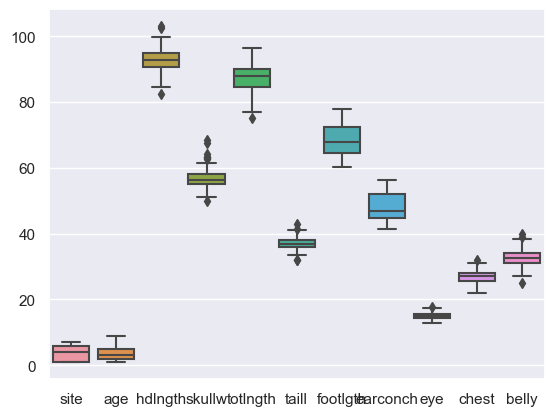

In [115]:
# строим boxplot

sns.boxplot(data = df)

Рассмотрим столбцы с выбросами по отдельности, определив по графику диаграмма размаха эти столбцы.

hdlngth

In [116]:
# возьмем функцию для определения границ усов, количества выбросов и их процент
def ejection (col):
    q75 = np.percentile(df[col], 75)
    q25 = np.percentile(df[col], 25)
    iqr = q75 - q25
    ejection_h = q75 + iqr * 1.5
    ejection_l = q25 - iqr * 1.5
    ejection_count = df[col][(df[col] > ejection_h) | (df[col] < ejection_l)].count()
    ejection_perc = ejection_count / len(df) * 100
    return(ejection_h, ejection_l, ejection_count, ejection_perc)
ejection('hdlngth')

(100.94999999999999, 84.55000000000001, 3, 2.9702970297029703)

In [117]:
df = df[(df['hdlngth'] < 100.94999999999999) & (df['hdlngth'] > 84.55000000000001)]
df

,site,pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,7,other,m,1.0,89.5,56.0,81.5,36.5,66.0,46.8,14.8,23.0,27.0
97,7,other,m,1.0,88.6,54.7,82.5,39.0,64.4,48.0,14.0,25.0,33.0
98,7,other,f,6.0,92.4,55.0,89.0,38.0,63.5,45.4,13.0,25.0,30.0
99,7,other,m,4.0,91.5,55.2,82.5,36.5,62.9,45.9,15.4,25.0,29.0


skullw

In [118]:
ejection('skullw')

(62.67500000000001, 50.474999999999994, 6, 6.122448979591836)

In [119]:
df = df[(df['skullw'] < 62.67500000000001) & (df['skullw'] > 50.474999999999994)]
df

,site,pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,7,other,m,1.0,89.5,56.0,81.5,36.5,66.0,46.8,14.8,23.0,27.0
97,7,other,m,1.0,88.6,54.7,82.5,39.0,64.4,48.0,14.0,25.0,33.0
98,7,other,f,6.0,92.4,55.0,89.0,38.0,63.5,45.4,13.0,25.0,30.0
99,7,other,m,4.0,91.5,55.2,82.5,36.5,62.9,45.9,15.4,25.0,29.0


totlngth

In [120]:
ejection('totlngth')

(98.25, 76.25, 1, 1.0869565217391304)

In [121]:
df = df[(df['totlngth'] < 98.25) & (df['totlngth'] > 76.25)]
df

,site,pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,7,other,m,1.0,89.5,56.0,81.5,36.5,66.0,46.8,14.8,23.0,27.0
97,7,other,m,1.0,88.6,54.7,82.5,39.0,64.4,48.0,14.0,25.0,33.0
98,7,other,f,6.0,92.4,55.0,89.0,38.0,63.5,45.4,13.0,25.0,30.0
99,7,other,m,4.0,91.5,55.2,82.5,36.5,62.9,45.9,15.4,25.0,29.0


taill

In [122]:
ejection('taill')

(41.0, 33.0, 3, 3.296703296703297)

In [123]:
df = df[(df['taill'] < 41.0) & (df['taill'] > 33.0)]
df

,site,pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,7,other,m,1.0,89.5,56.0,81.5,36.5,66.0,46.8,14.8,23.0,27.0
97,7,other,m,1.0,88.6,54.7,82.5,39.0,64.4,48.0,14.0,25.0,33.0
98,7,other,f,6.0,92.4,55.0,89.0,38.0,63.5,45.4,13.0,25.0,30.0
99,7,other,m,4.0,91.5,55.2,82.5,36.5,62.9,45.9,15.4,25.0,29.0


eye

In [124]:
ejection('eye')

(17.524999999999995, 12.525000000000002, 0, 0.0)

chest

In [125]:
ejection('chest')

(31.75, 21.75, 0, 0.0)

belly

In [126]:
ejection('belly')

(38.5, 26.5, 1, 1.1627906976744187)

In [127]:
df = df[(df['belly'] < 38.5) & (df['belly'] > 26.5)]
df

,site,pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,7,other,m,1.0,89.5,56.0,81.5,36.5,66.0,46.8,14.8,23.0,27.0
97,7,other,m,1.0,88.6,54.7,82.5,39.0,64.4,48.0,14.0,25.0,33.0
98,7,other,f,6.0,92.4,55.0,89.0,38.0,63.5,45.4,13.0,25.0,30.0
99,7,other,m,4.0,91.5,55.2,82.5,36.5,62.9,45.9,15.4,25.0,29.0


Все выбросы во всех столбцах были удалены для построения моделей.

Посмотрим на распределение непрерывных столбцов

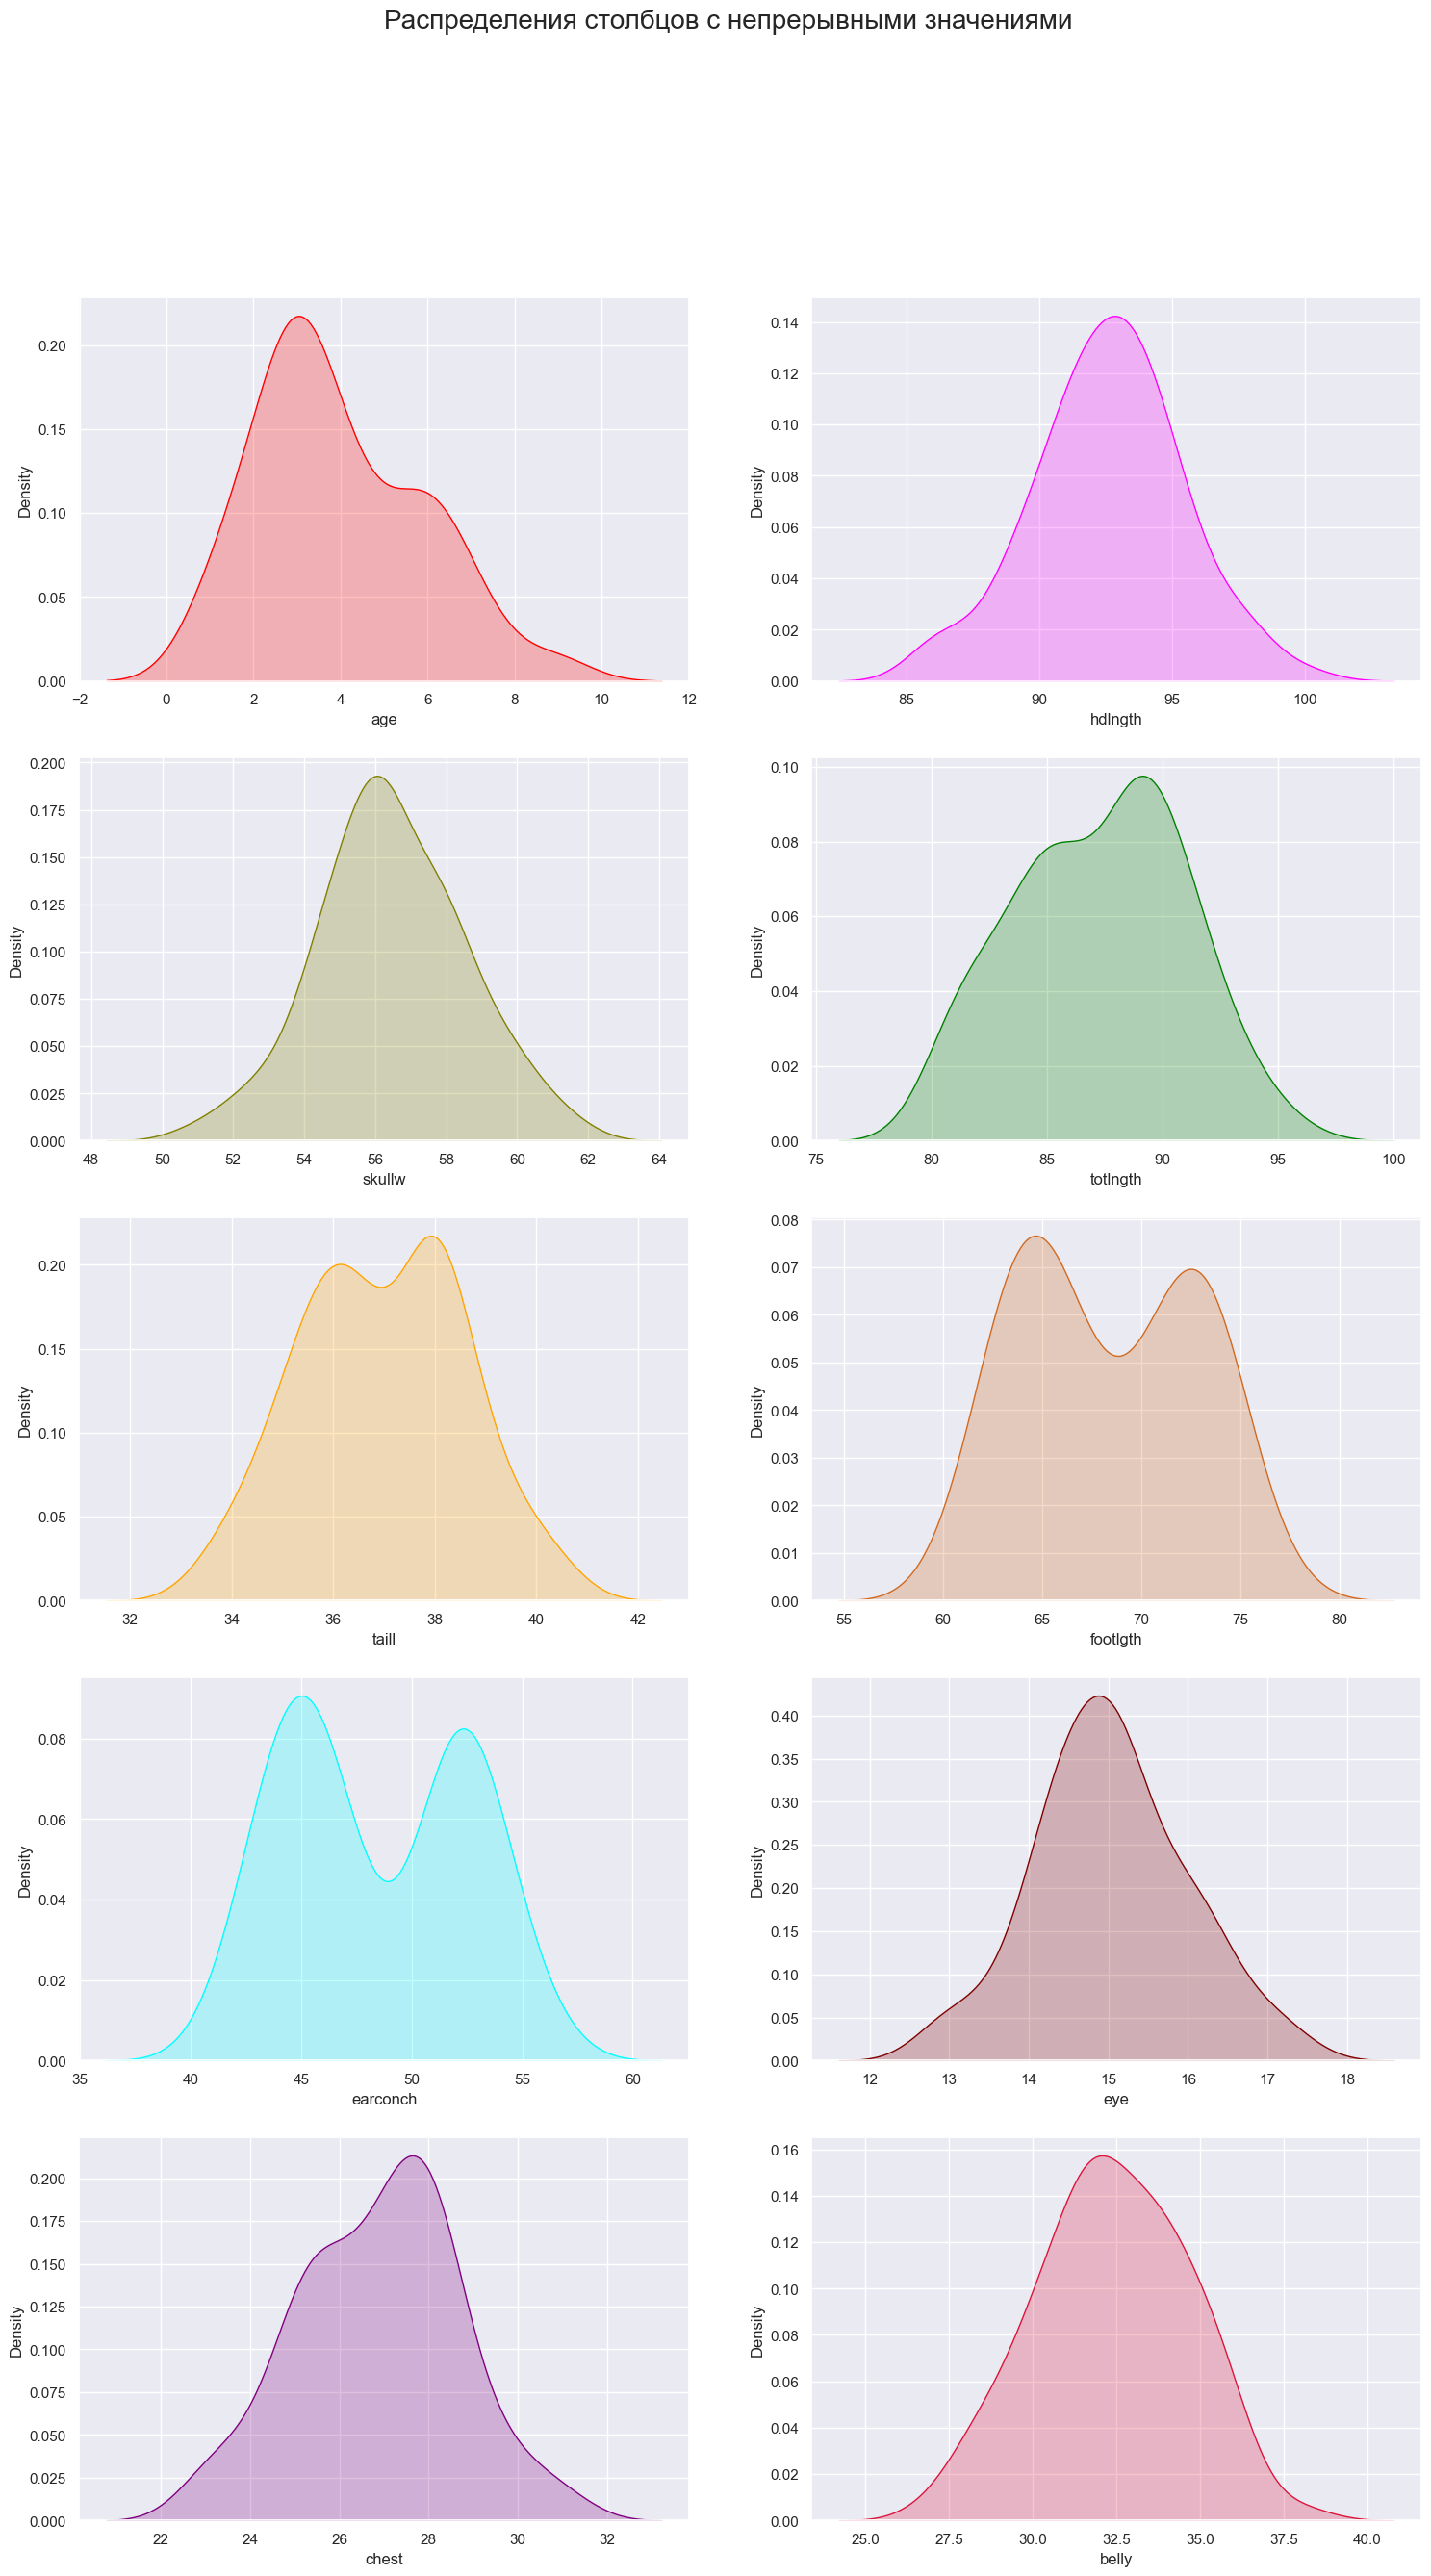

In [190]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(18,30))
fig.suptitle('Распределения столбцов с непрерывными значениями', size = 20)
sns.kdeplot(data = df, x = "age", color='red', fill = True, ax = axes[0,0])
sns.kdeplot(data = df, x = "hdlngth", color='magenta', fill = True, ax = axes[0,1])
sns.kdeplot(data = df, x = "skullw", color='olive', fill = True, ax = axes[1,0])
sns.kdeplot(data = df, x = "totlngth", color='green', fill = True, ax = axes[1,1])
sns.kdeplot(data = df, x = "taill", color='orange', fill = True, ax = axes[2,0])
sns.kdeplot(data = df, x = "footlgth", color='chocolate', fill = True, ax = axes[2,1])
sns.kdeplot(data = df, x = "earconch", color='cyan', fill = True, ax = axes[3,0])
sns.kdeplot(data = df, x = "eye", color='maroon', fill = True, ax = axes[3,1])
sns.kdeplot(data = df, x = "chest", color='purple', fill = True, ax = axes[4,0])
sns.kdeplot(data = df, x = "belly", color='crimson', fill = True, ax = axes[4,1])
plt.show()

Большая часть столбцов не имеет нормального распределения, будем это иметь в виду, но пока не будем трогать.

Также нужно закодировать столбцы pop, sex, так как они категориальные.

In [129]:
df.head(1)

,site,pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0


In [130]:
df['pop'].value_counts()

other    45
Vic      38
Name: pop, dtype: int64

In [131]:
df['sex'].value_counts()

m    48
f    35
Name: sex, dtype: int64

Кодируем бинарный признак pop

In [132]:
df['pop'] = (df['pop'] == 'Vic').astype(np.int32)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_12608\216336599.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pop'] = (df['pop'] == 'Vic').astype(np.int32)


Кодируем бинарный признак sex

In [133]:
df['sex'] = (df['sex'] == 'f').astype(np.int32)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_12608\479244467.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sex'] = (df['sex'] == 'f').astype(np.int32)


Посмотрим, как значения в дискретных столбцах распределились.

<Axes: xlabel='sex', ylabel='count'>

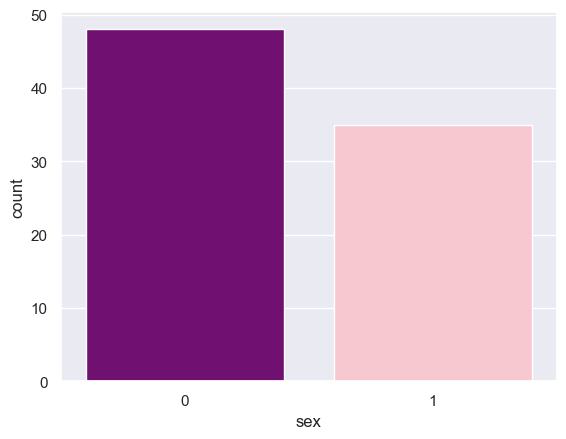

In [134]:
sns.countplot(data = df, x = 'sex', palette = ['purple', 'pink'])

0 - мужской пол, 1 - женский пол

<Axes: xlabel='pop', ylabel='count'>

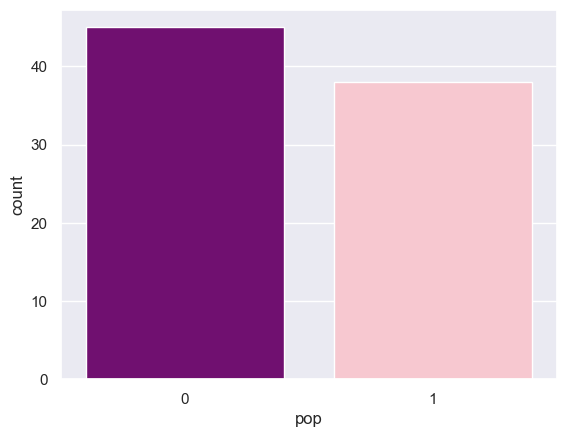

In [135]:
sns.countplot(data = df, x = 'pop', palette = ['purple', 'pink'])

0 - другие, 1 - виктория

<Axes: xlabel='site', ylabel='count'>

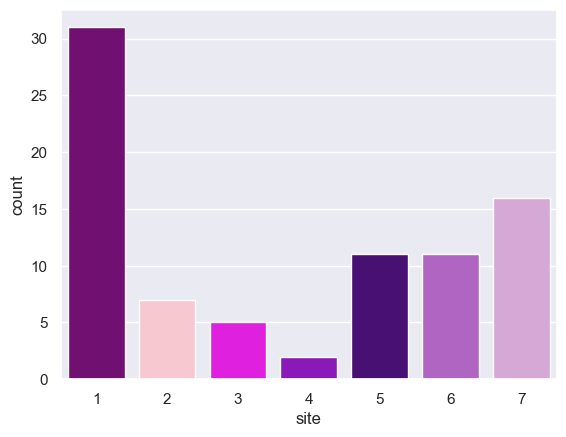

In [136]:
sns.countplot(data = df, x = 'site', palette = ['purple', 'pink', 'magenta', 'darkviolet', 'indigo', 'mediumorchid', 'plum'])

In [137]:
df.head(1)

,site,pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,0,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0


Чтобы не перезагружать ячейки каждый раз тут делаю выгрузку данных.

In [138]:
df.to_csv('dataset.csv', index=False)

В итоге в данных не было явных дубликатов, были удалены пропуски, выбросы. Большинство столбцов не имеют нормального распределения.

<b><a class="anchor" id="3"></a><div class="alert alert-block alert-success">Часть 2 - Построение моделей предсказания возраста опоссума

Приступим к построению моделей.

In [139]:
# загружаем данные
df = pd.read_csv('dataset.csv', sep = ',')
df

,site,pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,0,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,1,1,1,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,1,1,1,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,1,1,1,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,1,1,1,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,7,0,0,1.0,89.5,56.0,81.5,36.5,66.0,46.8,14.8,23.0,27.0
79,7,0,0,1.0,88.6,54.7,82.5,39.0,64.4,48.0,14.0,25.0,33.0
80,7,0,1,6.0,92.4,55.0,89.0,38.0,63.5,45.4,13.0,25.0,30.0
81,7,0,0,4.0,91.5,55.2,82.5,36.5,62.9,45.9,15.4,25.0,29.0


При построении моделей я использовала такие метрики как:
1) R^2 - он помогает сравнить разные модели
2) RMSE - штрафует за большие ошибки и при необходимотси легко интерпретируется, чувствительность к выбросам не страшна, т.к. они были предварительно обработаны

На тестовой выборке я использовала MSE, т.к. она отлично подходит для штрафования моделей за большие ошибки, и R^2 для сравнения моделей.

1. Строим линейную регрессию по всем данным

In [140]:
x = df.drop(['age'], axis=1)
y = df['age']

In [141]:
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2, random_state=13)

In [142]:
reg = LinearRegression().fit(train_x, train_y)
predictions = reg.predict(test_x)

In [143]:
# Вычисление метрик
mse = mean_squared_error(test_y, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(test_y, predictions)

# Вывод метрик
print("Метрики модели:")
print(f"- RMSE: {rmse:.4f}")
print(f"- R²: {r2:.4f}")

Метрики модели:
- RMSE: 1.5640
- R²: 0.1358


In [144]:
reg.score(test_x, test_y)

0.13575676141136594

In [145]:
mean_squared_error(reg.predict(test_x), test_y)

2.4461971251401473

2. Строим линейную регрессию на отобранных по матрице корреляций данных

In [146]:
corr_matrix = df.corr()
print(corr_matrix)
corr_matrix.style.background_gradient(cmap='coolwarm')

              site       pop       sex       age   hdlngth    skullw  \
site      1.000000 -0.914933 -0.188256 -0.170568 -0.310738 -0.226252   
pop      -0.914933  1.000000  0.145728  0.144454  0.231323  0.134285   
sex      -0.188256  0.145728  1.000000  0.080279 -0.135005 -0.100489   
age      -0.170568  0.144454  0.080279  1.000000  0.396799  0.444954   
hdlngth  -0.310738  0.231323 -0.135005  0.396799  1.000000  0.713393   
skullw   -0.226252  0.134285 -0.100489  0.444954  0.713393  1.000000   
totlngth -0.441428  0.302090  0.229239  0.302508  0.575721  0.548583   
taill     0.412067 -0.504728  0.124830  0.082043  0.050774  0.181320   
footlgth -0.843663  0.885023  0.104339  0.191487  0.407634  0.353509   
earconch -0.837780  0.925743  0.084173  0.117207  0.316367  0.185086   
eye      -0.120347 -0.015688 -0.155365  0.165844  0.360526  0.410159   
chest    -0.448112  0.388374  0.098019  0.402792  0.527284  0.538056   
belly    -0.281803  0.216155  0.083139  0.375743  0.401462  0.41

,site,pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
site,1.000000,-0.914933,-0.188256,-0.170568,-0.310738,-0.226252,-0.441428,0.412067,-0.843663,-0.837780,-0.120347,-0.448112,-0.281803
pop,-0.914933,1.000000,0.145728,0.144454,0.231323,0.134285,0.302090,-0.504728,0.885023,0.925743,-0.015688,0.388374,0.216155
sex,-0.188256,0.145728,1.000000,0.080279,-0.135005,-0.100489,0.229239,0.124830,0.104339,0.084173,-0.155365,0.098019,0.083139
age,-0.170568,0.144454,0.080279,1.000000,0.396799,0.444954,0.302508,0.082043,0.191487,0.117207,0.165844,0.402792,0.375743
hdlngth,-0.310738,0.231323,-0.135005,0.396799,1.000000,0.713393,0.575721,0.050774,0.407634,0.316367,0.360526,0.527284,0.401462
skullw,-0.226252,0.134285,-0.100489,0.444954,0.713393,1.000000,0.548583,0.181320,0.353509,0.185086,0.410159,0.538056,0.419046
totlngth,-0.441428,0.302090,0.229239,0.302508,0.575721,0.548583,1.000000,0.386586,0.464332,0.307295,0.244473,0.499716,0.367012
taill,0.412067,-0.504728,0.124830,0.082043,0.050774,0.181320,0.386586,1.000000,-0.302499,-0.461330,0.061376,0.002880,0.109838
footlgth,-0.843663,0.885023,0.104339,0.191487,0.407634,0.353509,0.464332,-0.302499,1.000000,0.860680,0.075045,0.483319,0.330357
earconch,-0.837780,0.925743,0.084173,0.117207,0.316367,0.185086,0.307295,-0.461330,0.860680,1.000000,-0.058931,0.377918,0.243645


In [147]:
column1 = ['chest', 'belly', 'eye', 'totlngth', 'hdlngth', 'skullw', 'site', 'pop', 'footlgth', 'earconch']

In [148]:
train_x_new = train_x[column1]
test_x_new = test_x[column1]
reg = LinearRegression().fit(train_x_new, train_y)
predictions = reg.predict(test_x_new)
# Вычисление метрик
mse = mean_squared_error(test_y, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(test_y, predictions)

# Вывод метрик
print("Метрики модели:")
print(f"- RMSE: {rmse:.4f}")
print(f"- R²: {r2:.4f}")

Метрики модели:
- RMSE: 1.5057
- R²: 0.1990


In [149]:
reg.score(test_x_new, test_y)

0.1990340900844667

In [150]:
mean_squared_error(reg.predict(test_x_new), test_y)

2.267093821145004

Попробуем отобрать факторы другими способами и посмотрим на результат.

In [151]:
# загружаем данные
df = pd.read_csv('dataset.csv', sep = ',')
df

,site,pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,0,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,1,1,1,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,1,1,1,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,1,1,1,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,1,1,1,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,7,0,0,1.0,89.5,56.0,81.5,36.5,66.0,46.8,14.8,23.0,27.0
79,7,0,0,1.0,88.6,54.7,82.5,39.0,64.4,48.0,14.0,25.0,33.0
80,7,0,1,6.0,92.4,55.0,89.0,38.0,63.5,45.4,13.0,25.0,30.0
81,7,0,0,4.0,91.5,55.2,82.5,36.5,62.9,45.9,15.4,25.0,29.0


1. С помощью диаграммы Шепли

In [152]:
x = df.drop(['age'], axis=1)
y = df['age']

In [153]:
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2, random_state=13)

In [154]:
reg = LinearRegression().fit(train_x, train_y)

In [155]:
explainer = shap.Explainer(reg, train_x)
shap_values = explainer(train_x)

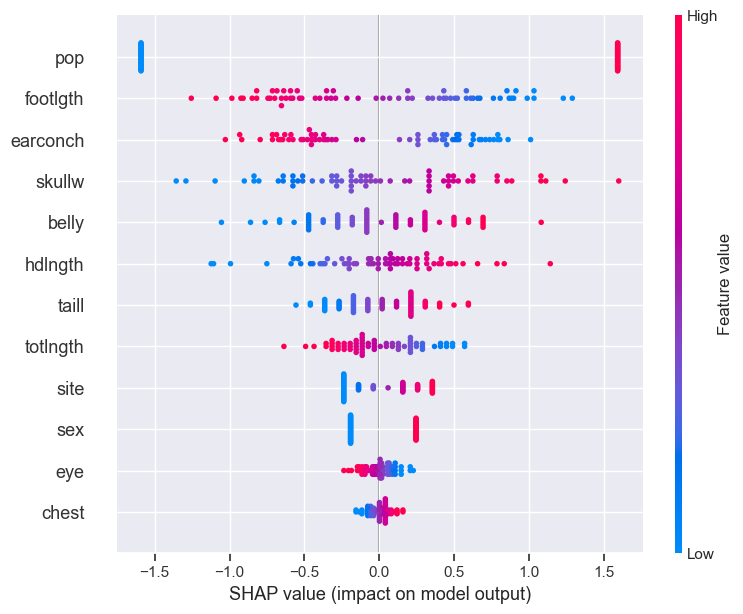

In [156]:
shap.summary_plot(shap_values, train_x)

2. С помощью пермутационной важности.

In [157]:
reg = LinearRegression().fit(train_x, train_y)

In [158]:
perm = PermutationImportance(reg, random_state=42).fit(test_x, test_y)

In [159]:
eli5.show_weights(perm, feature_names=list(test_x.columns))

Weight,Feature
1.1320 ± 0.7166,pop
0.5123 ± 0.5412,skullw
0.4641 ± 0.2122,earconch
0.3126 ± 0.3199,footlgth
0.1340 ± 0.1394,site
0.1182 ± 0.2542,hdlngth
0.1044 ± 0.1832,taill
0.0383 ± 0.1510,totlngth
0.0274 ± 0.2743,belly
0.0150 ± 0.0725,sex


Последние 3 признака и там, и там одинаковые, попробуем построить модель без них.

In [160]:
column1 = ['belly', 'totlngth', 'hdlngth', 'skullw', 'site', 'pop', 'footlgth', 'earconch', 'taill']

In [161]:
train_x_new = train_x[column1]
test_x_new = test_x[column1]
reg = LinearRegression().fit(train_x_new, train_y)
predictions = reg.predict(test_x_new)
# Вычисление метрик
mse = mean_squared_error(test_y, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(test_y, predictions)

# Вывод метрик
print("Метрики модели:")
print(f"- RMSE: {rmse:.4f}")
print(f"- R²: {r2:.4f}")

Метрики модели:
- RMSE: 1.5732
- R²: 0.1256


In [162]:
reg.score(test_x_new, test_y)

0.1255825291680328

In [163]:
mean_squared_error(reg.predict(test_x_new), test_y)

2.4749947790330418

Также в первых 6 признаках есть одно различие, поэтому были взяты первые 4 и 6 признаки.

In [164]:
column1 = ['skullw', 'pop', 'footlgth', 'earconch', 'hdlngth']

In [165]:
train_x_new = train_x[column1]
test_x_new = test_x[column1]
reg = LinearRegression().fit(train_x_new, train_y)
predictions = reg.predict(test_x_new)
# Вычисление метрик
mse = mean_squared_error(test_y, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(test_y, predictions)

# Вывод метрик
print("Метрики модели:")
print(f"- RMSE: {rmse:.4f}")
print(f"- R²: {r2:.4f}")

Метрики модели:
- RMSE: 1.4956
- R²: 0.2097


In [166]:
reg.score(test_x_new, test_y)

0.20972222595646173

In [167]:
mean_squared_error(reg.predict(test_x_new), test_y)

2.236841588815274

3. Строим линейную регрессию на стандартизированных данных

In [168]:
scaler = StandardScaler()
x_train_st = scaler.fit_transform(train_x)

In [169]:
# создадим модель линейной регрессии
model = LinearRegression()

# обучим нашу модель
model.fit(x_train_st, train_y)

print(model.coef_, model.intercept_)

[ 0.23958296  1.59070233  0.21677668  0.43020797  0.62184102 -0.27400059
  0.27128067 -0.67492728 -0.56909951 -0.09746238  0.07032745  0.43545262] 4.106060606060602


In [170]:
# Используем «стандартизатор» для тестовой выборки
x_test_st = scaler.transform(test_x)

In [171]:
y_pred = model.predict(x_test_st)

In [172]:
# Вычисление метрик
mse = mean_squared_error(test_y, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(test_y, y_pred)

# Вывод метрик
print("Метрики модели:")
print(f"- RMSE: {rmse:.4f}")
print(f"- R²: {r2:.4f}")

Метрики модели:
- RMSE: 1.5640
- R²: 0.1358


4. Строим модель на нормализованных данных

In [173]:
scaler = MinMaxScaler()
x_train_st = scaler.fit_transform(train_x)

In [174]:
# создадим модель линейной регрессии
model = LinearRegression()

# обучим нашу модель
model.fit(x_train_st, train_y)

print(model.coef_, model.intercept_)

[ 0.59138751  3.18140467  0.43677386  2.26354254  2.95387013 -1.20600765
  1.15046779 -2.54319018 -2.03752112 -0.46329278  0.31302357  2.13425763] 0.9347162325969531


In [175]:
# Используем «стандартизатор» для тестовой выборки
x_test_st = scaler.transform(test_x)

In [176]:
y_pred = model.predict(x_test_st)

In [177]:
# Вычисление метрик
mse = mean_squared_error(test_y, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(test_y, y_pred)

# Вывод метрик
print("Метрики модели:")
print(f"- RMSE: {rmse:.4f}")
print(f"- R²: {r2:.4f}")

Метрики модели:
- RMSE: 1.5640
- R²: 0.1358


5. Применяем к линейной регрессии регуляризацию, Lasso-регрессия

In [178]:
model = Lasso()
model.fit(x_train_st, train_y)
print(model.coef_, model.intercept_)

[-0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.] 4.106060606060606


In [179]:
x_test_st = scaler.transform(test_x)

In [180]:
y_pred = model.predict(x_test_st)

In [181]:
# Вычисление метрик
mse = mean_squared_error(test_y, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(test_y, y_pred)

# Вывод метрик
print("Метрики модели:")
print(f"- RMSE: {rmse:.4f}")
print(f"- R²: {r2:.4f}")

Метрики модели:
- RMSE: 1.8200
- R²: -0.1703


6. Применяем к линейной регрессии регуляризацию, Ridge-регрессия

In [182]:
model = Ridge()
model.fit(train_x, train_y)
print(model.coef_, model.intercept_)

[-0.0405862   1.5425472   0.44747415  0.14113503  0.317389   -0.0878454
  0.1773031  -0.11386143 -0.05192028 -0.11668536  0.05424974  0.16989609] -21.482928777750168


In [183]:
y_pred = model.predict(test_x)

In [184]:
# Вычисление метрик
mse = mean_squared_error(test_y, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(test_y, y_pred)

# Вывод метрик
print("Метрики модели:")
print(f"- RMSE: {rmse:.4f}")
print(f"- R²: {r2:.4f}")

Метрики модели:
- RMSE: 1.5643
- R²: 0.1355


7. Cтроим модель XGBRegressor

In [185]:
X, y = df.drop('age', axis=1), df['age']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=13)
model = xgb.XGBRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Вычисление метрик
mse = mean_squared_error(test_y, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(test_y, y_pred)

# Вывод метрик
print("Метрики модели:")
print(f"- RMSE: {rmse:.4f}")
print(f"- R²: {r2:.4f}")

Метрики модели:
- RMSE: 1.1274
- R²: 0.5509


8. Строим модель случайного леса

In [186]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
import numpy as np

# Разделение данных на признаки и целевую переменную
X = df.drop('age', axis=1)
y = df['age']

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Создание и обучение модели случайного леса для регрессии
model = RandomForestRegressor(n_estimators=300, random_state=42)
model.fit(X_train, y_train)

# Прогнозирование на тестовой выборке
y_pred = model.predict(X_test)

# Вычисление метрик
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Вывод метрик
print("Метрики модели:")
print(f"- RMSE: {rmse:.4f}")
print(f"- R²: {r2:.4f}")

Метрики модели:
- RMSE: 1.9151
- R²: 0.1085


Самой лучшей моделью по всем показателям стала модель XGBBoost, которая единственная показала результат R^2 больше 0,5. Если использовать линейные модели, то лучше всех оказалась регрессия, построенная на 5 признаках, отобранных с помощью алгоритма Шепли и алгоритма пермутационной важности.